## Predict the House Price (Random Forest Classifier)

In [1]:
#Importing the required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing Datasets

In [4]:
dataset = pd.read_csv('C:/Users/hp/Desktop/MentorBuddy/Datasets/house_price.csv')
dataset.head()

,Location,BHK,Furnishing,Sq.ft,Old(years),Floor,Price
0,Bommanahalli,3,1,3000,1,3,28000
1,Bommanahalli,3,1,1650,10,0,18000
2,Whitefield,2,0,1000,5,3,16400
3,Whitefield,3,0,1600,1,9,27000
4,Whitefield,2,1,1200,5,1,20000


In [7]:
dataset.shape

(1000, 7)

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Location    1000 non-null   object
 1   BHK         1000 non-null   int64 
 2   Furnishing  1000 non-null   int64 
 3   Sq.ft       1000 non-null   int64 
 4   Old(years)  1000 non-null   int64 
 5   Floor       1000 non-null   int64 
 6   Price       1000 non-null   int64 
dtypes: int64(6), object(1)
memory usage: 50.8+ KB


In [5]:
dataset["Location"].value_counts()

Bommanahalli    504
Whitefield      496
Name: Location, dtype: int64

### Label_Encoder

In [6]:
#Hence in the dataset the Location column is consisted of strings so we cannot directly apply Random Forest it gives us error
#thet strings cannot be coverted to float thats why I have used Label encoder to convert strings into int.
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset.Location = le.fit_transform(dataset.Location)
dataset.head()

,Location,BHK,Furnishing,Sq.ft,Old(years),Floor,Price
0,0,3,1,3000,1,3,28000
1,0,3,1,1650,10,0,18000
2,1,2,0,1000,5,3,16400
3,1,3,0,1600,1,9,27000
4,1,2,1,1200,5,1,20000


<function matplotlib.pyplot.show(close=None, block=None)>

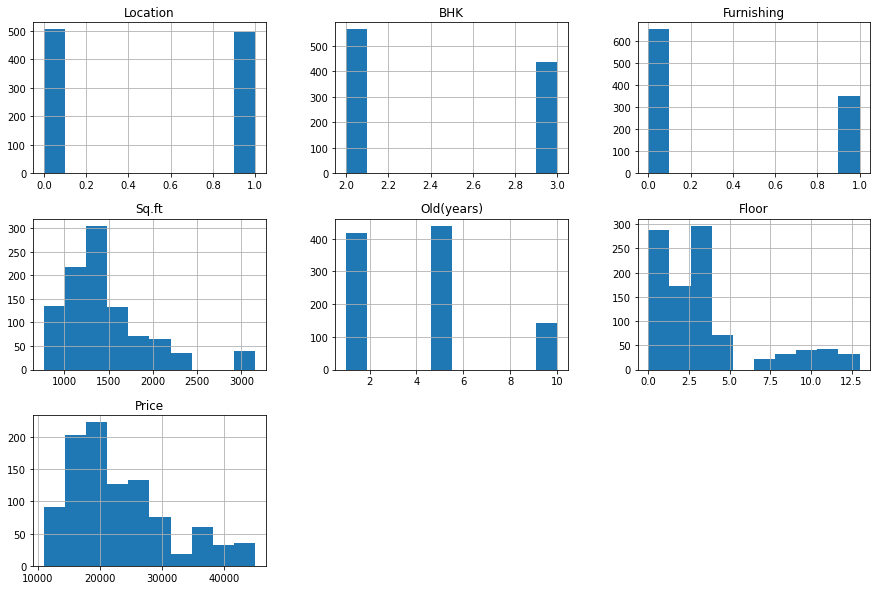

In [9]:
dataset.hist(figsize=(15,10))
plt.show

<AxesSubplot:xlabel='Sq.ft', ylabel='Price'>

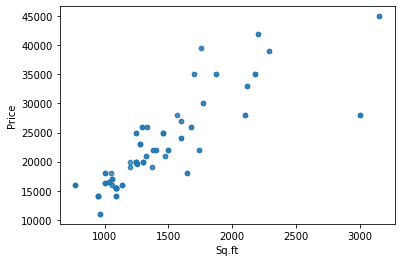

In [21]:
dataset.plot(kind="scatter", x="Sq.ft",y="Price", alpha=0.1)

In [10]:
x = dataset.iloc[:, 1: 6]
y = dataset.iloc[:, 6]

In [11]:
x
y

0      28000
1      18000
2      16400
3      27000
4      20000
       ...  
995    25000
996    28000
997    16500
998    22000
999    30000
Name: Price, Length: 1000, dtype: int64

### Splitting the dataset into training-set and testing-set 

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split (x, y, test_size = 0.3, random_state = 30)

In [7]:
x_train.head()

,BHK,Furnishing,Sq.ft,Old(years),Floor
802,2,1,1200,5,4
434,3,1,1460,1,2
900,2,0,1050,10,2
137,3,0,2117,1,0
413,3,1,1381,1,4


In [8]:
y_train.head()

802    19000
434    25000
900    18000
137    33000
413    22000
Name: Price, dtype: int64

### Feature Scaling

In [8]:
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

In [9]:
RF = RandomForestClassifier(n_estimators = 41 , random_state = 52)

In [13]:
clf = RF.fit(x_train, y_train)

ValueError: could not convert string to float: 'Bommanahalli'

In [95]:
clf.estimators_

[DecisionTreeClassifier(max_features='auto', random_state=1387748341),
 DecisionTreeClassifier(max_features='auto', random_state=1388881564),
 DecisionTreeClassifier(max_features='auto', random_state=112175883),
 DecisionTreeClassifier(max_features='auto', random_state=628153869),
 DecisionTreeClassifier(max_features='auto', random_state=905253015),
 DecisionTreeClassifier(max_features='auto', random_state=1806825558),
 DecisionTreeClassifier(max_features='auto', random_state=508617628),
 DecisionTreeClassifier(max_features='auto', random_state=1408082423),
 DecisionTreeClassifier(max_features='auto', random_state=422128544),
 DecisionTreeClassifier(max_features='auto', random_state=580736965),
 DecisionTreeClassifier(max_features='auto', random_state=515960042),
 DecisionTreeClassifier(max_features='auto', random_state=2032962443),
 DecisionTreeClassifier(max_features='auto', random_state=231456731),
 DecisionTreeClassifier(max_features='auto', random_state=1442783482),
 DecisionTreeC

### Visualizing Random Forest

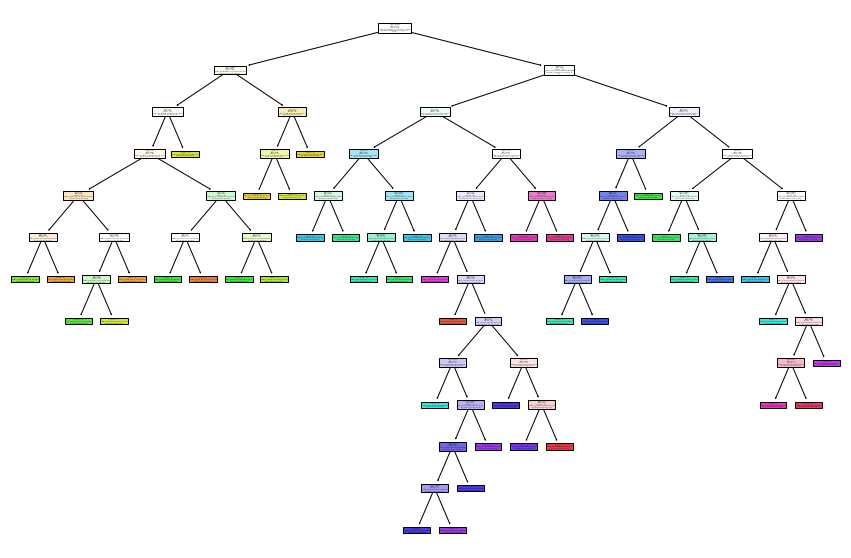

In [97]:
plt.figure(figsize=(15,10))
tree.plot_tree(clf.estimators_[40], filled = True);

### Prediction With Random Forest

In [99]:
pred = RF.predict(x_test)
pred

array([16000, 35000, 14000, 19500, 45000, 11000, 11000, 35000, 11000,
       28000, 16400, 28000, 21000, 20000, 11000, 25000, 17000, 25000,
       11000, 11000, 28000, 11000, 19500, 18000, 22000, 30000, 35000,
       19500, 19000, 16000, 42000, 26000, 26000, 26000, 21000, 16000,
       16000, 27000, 16500, 35000, 35000, 14000, 26000, 22000, 23000,
       16000, 26000, 33000, 20000, 16500, 35000, 35000, 19500, 42000,
       19000, 22000, 19000, 45000, 16500, 28000, 22000, 16500, 24000,
       19000, 17000, 25000, 28000, 20000, 20000, 25000, 26000, 20000,
       26000, 39000, 20000, 42000, 26000, 20000, 39500, 35000, 15500,
       21000, 35000, 26000, 20000, 45000, 23000, 33000, 25000, 20000,
       15500, 16000, 16400, 24000, 15500, 17000, 16000, 20000, 35000,
       42000, 20000, 16400, 20000, 18000, 39000, 14000, 28000, 39500,
       25000, 35000, 28000, 25000, 25000, 18000, 45000, 14000, 24000,
       19500, 14000, 26000, 18000, 21000, 23000, 21000, 22000, 24000,
       21000, 16000,

In [102]:
from sklearn.metrics import confusion_matrix , accuracy_score

In [103]:
confusion_matrix(y_test,pred)

array([[10,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 17,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 16,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 18,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 10,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  5,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 10,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 16,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 

In [105]:
accuracy_score(y_test,pred)

1.0